# Annotation statistics

Script to evaluate annotation statistics, including how many documents were annotated, and within this how many of each named entity was annotated.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Function to load in json file from LightTag
def load_json_to_df(file):
    
    results = json.load(open(file))
    
    # Create list of only those posts which have been annotated
    annotated = []
    for example in results['examples']:
        if example['annotations'] != []:
            annotated.append(example)
            
    return pd.DataFrame(annotated)

In [3]:
TRAIN_DATA = load_json_to_df('ingredient-tagger_annotations.json')
TRAIN_DATA.head(3)

,content,seen_by,metadata,example_id,annotations,classifications
0,masala paneer \n\nto set the paneer why to use...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 230},6aea61a1-ee55-4aa3-8af9-3ac0a0275b69,"[{'end': 756, 'tag': 'INGREDIENT', 'start': 74...",[]
1,"warm salad of purple sprouting broccoli, new p...","[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 459},5c5cef61-a0d1-4665-b2d1-eb782377aeba,"[{'end': 360, 'tag': 'MEASUREMENT', 'start': 3...",[]
2,if you are looking to bring a yummy pasta sala...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 564},d4773a47-0223-4902-a2d2-97ba6715bf10,"[{'end': 605, 'tag': 'MEASUREMENT', 'start': 5...",[]


In [4]:
TEST_DATA = load_json_to_df('ingredient-tagger_annotations_2.json')
TEST_DATA.head(3)

,content,seen_by,metadata,example_id,annotations,classifications
0,baked potato skins \n\n prep: 5 mins\n cook: 1...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 1598},0ca050c0-3606-4c44-b2c1-14811079ff71,"[{'end': 156, 'tag': 'QUANTITY', 'start': 155,...",[]
1,savor the end of summer watermelon season with...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 1673},fc7627ea-de89-4750-a14c-1949e03d55d3,"[{'end': 374, 'tag': 'INGREDIENT', 'start': 36...",[]
2,caprese pasta salad i forgot to add in my gard...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 2034},25aeac2a-b15d-472b-b146-9f99306ec7c2,"[{'end': 54, 'tag': 'INGREDIENT', 'start': 49,...",[]


## Counting the annotations from each post

In [5]:
def count_annotations(annotations_list):
    
    num_entities = len(annotations_list)
    
    num_INGREDIENT = 0
    num_QUANTITY = 0
    num_MEASUREMENT = 0
    
    for entity in annotations_list:
        if entity['tag'] =='INGREDIENT':
            num_INGREDIENT += 1
        if entity['tag'] =='QUANTITY':
            num_QUANTITY += 1
        if entity['tag'] =='MEASUREMENT':
            num_MEASUREMENT += 1

    if num_entities != num_INGREDIENT + num_QUANTITY + num_MEASUREMENT:
        print('Error: Number of entities does not match.')
        
    return pd.Series([num_entities, num_INGREDIENT, num_MEASUREMENT, num_QUANTITY])

In [6]:
TRAIN_DATA[['entities', 'INGREDIENT', 'MEASUREMENT', 'QUANTITY']] = TRAIN_DATA['annotations'].apply(count_annotations)
TEST_DATA[['entities', 'INGREDIENT', 'MEASUREMENT', 'QUANTITY']] = TEST_DATA['annotations'].apply(count_annotations)

In [8]:
TEST_DATA

,content,seen_by,metadata,example_id,annotations,classifications,entities,INGREDIENT,MEASUREMENT,QUANTITY
0,baked potato skins \n\n prep: 5 mins\n cook: 1...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 1598},0ca050c0-3606-4c44-b2c1-14811079ff71,"[{'end': 156, 'tag': 'QUANTITY', 'start': 155,...",[],14,8,0,6
1,savor the end of summer watermelon season with...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 1673},fc7627ea-de89-4750-a14c-1949e03d55d3,"[{'end': 374, 'tag': 'INGREDIENT', 'start': 36...",[],21,8,5,8
2,caprese pasta salad i forgot to add in my gard...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 2034},25aeac2a-b15d-472b-b146-9f99306ec7c2,"[{'end': 54, 'tag': 'INGREDIENT', 'start': 49,...",[],10,10,0,0
3,masala paneer \n\nto set the paneer why to use...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 230},6aea61a1-ee55-4aa3-8af9-3ac0a0275b69,"[{'end': 575, 'tag': 'QUANTITY', 'start': 574,...",[],30,13,4,13
4,[ad] porridge for a warm winter lunch \n\ningr...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 334},c063c7f6-5055-4e41-9f09-39f7c18d9012,"[{'end': 278, 'tag': 'INGREDIENT', 'start': 27...",[],22,9,5,8
5,"warm salad of purple sprouting broccoli, new p...","[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 459},5c5cef61-a0d1-4665-b2d1-eb782377aeba,"[{'end': 365, 'tag': 'QUANTITY', 'start': 364,...",[],67,32,10,25
6,if you are looking to bring a yummy pasta sala...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 564},d4773a47-0223-4902-a2d2-97ba6715bf10,"[{'end': 1340, 'tag': 'INGREDIENT', 'start': 1...",[],72,27,17,28
7,need an easy brunch recipe? this plant-based b...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 592},55b1d911-1eaa-4da1-8ec2-6fd108c277aa,"[{'end': 250, 'tag': 'INGREDIENT', 'start': 23...",[],33,15,5,13
8,spicy tuna pancake/gochu-chamchi jeon!(고추참치전) ...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 1072},bf01bb9a-5a39-4ef1-84f6-dcfe78b92cf8,"[{'end': 332, 'tag': 'INGREDIENT', 'start': 32...",[],28,13,3,12
9,prawn taco bowl\n\neating keto is simple⁠\n- l...,"[{'annotator': 'jy18214@bristol.ac.uk', 'annot...",{'': 1221},9bd8b876-3524-44b2-aed9-326a92c1f56f,"[{'end': 735, 'tag': 'INGREDIENT', 'start': 73...",[],40,20,7,13


## Analysis of findings

In [9]:
print(f'num_posts {len(TRAIN_DATA)}')
for col in ['entities', 'INGREDIENT', 'MEASUREMENT', 'QUANTITY']:
    print(col, TRAIN_DATA[col].sum())

num_posts 36
entities 1322
INGREDIENT 648
MEASUREMENT 217
QUANTITY 457


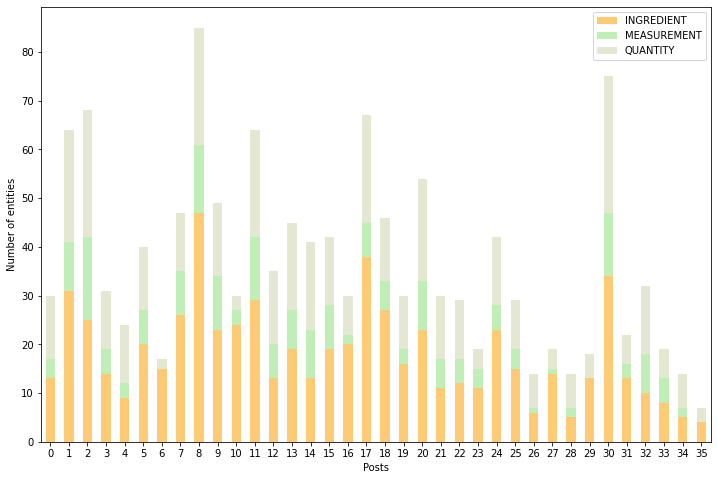

In [10]:
colors = {
    "MEASUREMENT": "#bfeeb7",
    "INGREDIENT": "#feca74",
    "QUANTITY": "#e4e7d2"
}
ax = TRAIN_DATA.plot.bar(y=['INGREDIENT', 'MEASUREMENT', 'QUANTITY'],
                          rot=0,
                          stacked=True,
                          color=colors,
                          figsize=(12,8), xlabel='Posts', ylabel='Number of entities')
plt.show()

In [11]:
print(f'num_posts {len(TEST_DATA)}')
for col in ['entities', 'INGREDIENT', 'MEASUREMENT', 'QUANTITY']:
    print(col, TEST_DATA[col].sum())

num_posts 50
entities 1860
INGREDIENT 937
MEASUREMENT 292
QUANTITY 631


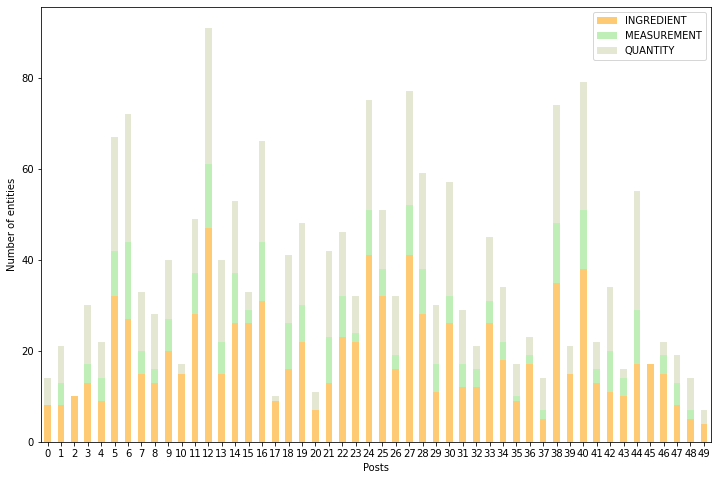

In [12]:
ax = TEST_DATA.plot.bar(y=['INGREDIENT', 'MEASUREMENT', 'QUANTITY'],
                          rot=0,
                          stacked=True,
                          color=colors,
                          figsize=(12,8), xlabel='Posts', ylabel='Number of entities')
plt.show()

## Dev set

In [13]:
# Function to load in json file from LightTag
def load_json_to_df(file):
    
    results = json.load(open(file))
    
    # Create list of only those posts which have been annotated
    annotated = []
    for example in results['examples']:
        if example['annotations'] != []:
            annotated.append(example)
            
    return pd.DataFrame(annotated)


# Function to convert data into spacy format
def convert_to_spacy_format(df):
    
    TRAIN_DATA = []
    
    for index, row in df.iterrows():
        
        sentence = row['content']
        annotations_input_list = row['annotations']
        
        annotations_output_list = []
        ing_dict = {}
        
        for annotation in annotations_input_list:
            
            annotations_output_list.append((annotation['start'], annotation['end'], annotation['tag']))
        
        ing_dict['entities'] = annotations_output_list
        TRAIN_DATA.append((sentence, ing_dict))
        
    return TRAIN_DATA

In [14]:
TRAIN_DATA_spacy = convert_to_spacy_format(load_json_to_df('ingredient-tagger_annotations.json'))

In [17]:
import random
# Splitting into train and dev set
random.seed(23)
random.shuffle(TRAIN_DATA_spacy)
split_integer = int(len(TRAIN_DATA_spacy)*0.8)
train_set = TRAIN_DATA_spacy[:split_integer]
dev_set = TRAIN_DATA_spacy[split_integer:]

In [21]:
train_set

[('made fruit triffle \n\ningredients : \nmilk 10 kg \n1 large vanilla custard packet \n1 packet of jelly \nhalf kg sugar (you can adjust according to your taste) \nfew drops of vanilla essence \n4-5 plain cakes \nfruits (apple and banana)',
  {'entities': [(187, 188, 'QUANTITY'),
    (48, 49, 'QUANTITY'),
    (107, 112, 'INGREDIENT'),
    (82, 88, 'MEASUREMENT'),
    (41, 43, 'QUANTITY'),
    (44, 46, 'MEASUREMENT'),
    (72, 78, 'MEASUREMENT'),
    (36, 40, 'INGREDIENT'),
    (64, 71, 'INGREDIENT'),
    (56, 63, 'INGREDIENT'),
    (185, 186, 'QUANTITY'),
    (168, 175, 'INGREDIENT'),
    (80, 81, 'QUANTITY'),
    (104, 106, 'MEASUREMENT'),
    (92, 97, 'INGREDIENT'),
    (159, 164, 'MEASUREMENT'),
    (220, 226, 'INGREDIENT'),
    (99, 103, 'QUANTITY'),
    (210, 215, 'INGREDIENT')]}),
 ('paneer matar pulao\nsave it to try later\n\ningredients :-\nfor barista/fried onion - oil + finely sliced onion\nfry it till turns golden and take it out\n\nfor pulao -\noil - 2 tablespoon\nghee - 2

In [35]:
# train set
entity_list = [triplet[2] for triplet_list in [i[1]['entities'] for i in train_set] for triplet in triplet_list]
print(len(train_set))
print("entities",len(entity_list))
for entity in ['INGREDIENT', 'QUANTITY', 'MEASUREMENT']:
    print(entity, entity_list.count(entity))

28
entities 994
INGREDIENT 478
QUANTITY 348
MEASUREMENT 168


In [34]:
# dev set
entity_list = [triplet[2] for triplet_list in [i[1]['entities'] for i in dev_set] for triplet in triplet_list]
print(len(dev_set))
print("entities",len(entity_list))
for entity in ['INGREDIENT', 'QUANTITY', 'MEASUREMENT']:
    print(entity, entity_list.count(entity))

8
entities 328
INGREDIENT 170
QUANTITY 109
MEASUREMENT 49


In [36]:
328+994

1322